## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

## Loading and checking the data set

In [2]:
loan_dataset = pd.read_csv("profile_and_loan details_data.csv")
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA (Exploratory Data Analysis)

#### Data exploration

In [3]:
loan_dataset.shape

(614, 13)

In [4]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1. Missing values

In [6]:
# check for missing values
loan_dataset.isnull().sum()

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0
dtype: int64

2. Numerical variable

In [7]:
# statistical measures of the dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


3. other exploration

<Axes: xlabel='Education', ylabel='count'>

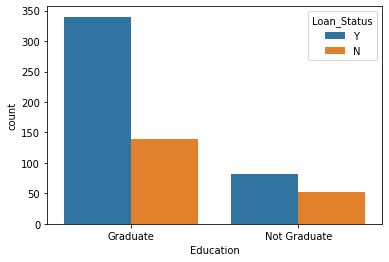

In [8]:
# Categorical 📊 - Categorical 📊
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

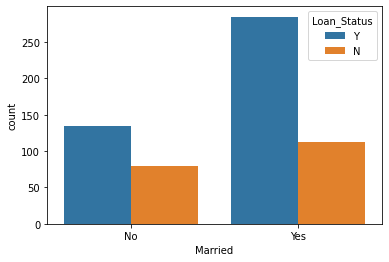

In [9]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

## Data preprocessing

1.Drop unnecessary variables & Missing value

In [10]:
# drop unnecessary features
loan_dataset = loan_dataset.drop(columns=['Loan_ID'])

# dropping the missing values
loan_dataset = loan_dataset.dropna()
# check for missing values
loan_dataset.isnull().sum()

Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 0
Property_Area 0
Loan_Status 0
dtype: int64

2. Data Transformation

In [11]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset.head()

# Dependent column values
loan_dataset['Dependents'].value_counts()
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
# dependent values
loan_dataset['Dependents'].value_counts()

# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-12-1ca2309734cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = loan_dataset.corr()


<Axes: >

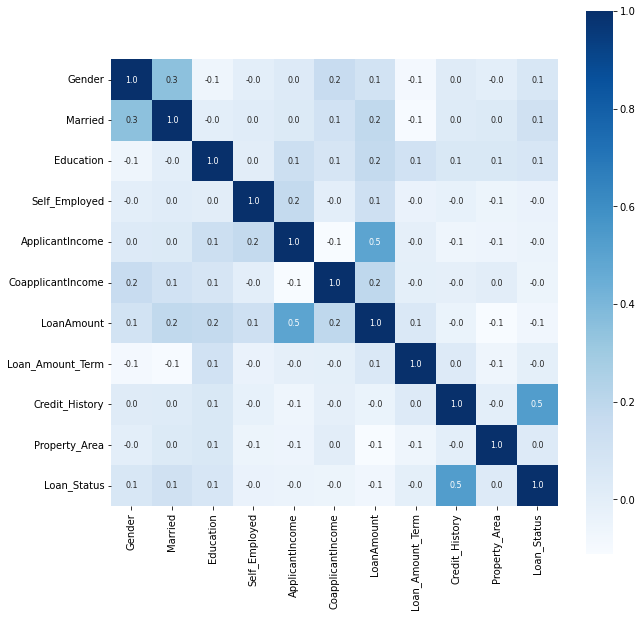

In [12]:
correlation = loan_dataset.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## Train Model

In [13]:
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

print(X)
print(y)

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [14]:
# loading the model
model = svm.SVC(kernel='linear')

In [15]:
# training the support Vector Macine model
model.fit(X_train,y_train)

SVC(kernel='linear') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC(kernel='linear')

In [16]:
# model evaluation on training data/ convenient for quick model evaluation
model.score(X_train,y_train)

0.7986111111111112

In [17]:
# model evaluation on training data/ flexibility
training_data_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(training_data_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [18]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# accuracy score on test data
test_data_accuray = accuracy_score(test_data_prediction,y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334
